In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

plt.style.use('ggplot')

In [2]:
data = pd.read_csv('data.csv')
print(data.shape)
data.head()

(18403, 25)


,Artist,Album,Review Author,Score,Accolade,Release Year,Review Date,Record Label,Genre,Release Year 2,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,NaN,2009.0,February 18 2009,Studio,Electronic,NaN,...,0.499667,5.250000,-5.626583,0.666667,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,NaN,2005.0,February 13 2005,Water,Folk/Country,NaN,...,0.325412,4.470588,-19.153824,0.764706,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,NaN,2004.0,August 19 2004,In the Red,Electronic,NaN,...,0.912857,4.428571,-1.089500,0.714286,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
3,The Red Thread,After the Last,Chris Dahlen,7.3,NaN,2003.0,July 17 2003,Badman,Rock,NaN,...,0.433474,5.700000,-12.871000,0.600000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200
4,Mac Miller,Swimming,Evan Rytlewski,7.5,NaN,2018.0,August 3 2018,Warner Bros.,Rap,NaN,...,0.438154,4.153846,-9.456077,0.615385,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308


In [3]:
data.describe()

,Score,Release Year,Release Year 2,matched,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,18403.000000,18078.000000,595.000000,18403.0,18403.000000,18403.000000,18403.000000,18403.000000,18403.000000,18403.000000,18403.000000,18403.000000,18403.000000,18403.000000,18403.000000
mean,7.033255,2009.315411,2009.275630,1.0,0.510635,0.600806,5.215836,-9.318390,0.650245,0.091125,0.302895,0.278616,0.196500,0.404326,120.289697
std,1.251850,7.708710,5.284626,0.0,0.159833,0.204257,1.619708,4.264038,0.249390,0.092428,0.263730,0.300740,0.105458,0.183464,15.613327
min,0.000000,1957.000000,1982.000000,1.0,-1.000000,-1.000000,-1.000000,-51.728750,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,6.500000,2005.000000,2005.000000,1.0,0.405784,0.471787,4.333333,-11.248350,0.500000,0.040704,0.089842,0.010060,0.134153,0.271800,111.193425
50%,7.300000,2010.000000,2009.000000,1.0,0.510417,0.624364,5.230769,-8.492333,0.666667,0.056808,0.229806,0.153433,0.174350,0.405313,120.367385
75%,7.800000,2015.000000,2014.000000,1.0,0.622000,0.750586,6.100000,-6.416397,0.833333,0.100029,0.463416,0.506816,0.228890,0.532203,129.098775
max,10.000000,2019.000000,2017.000000,1.0,0.974000,0.999000,11.000000,4.078000,1.000000,0.958000,0.996000,0.982000,0.978000,0.971000,215.972000


In [4]:
# First, dropping the "Unnamed 0" column; its a left over from data pulling

#data = data.drop('Unnamed: 0', axis=1)

# We'll also drop "Release Year 2"; this is when an album was re-released, 
# so P4K reviewed it the second time around -- we don't care about those albums

data = data.drop('Release Year 2', axis=1)

# We'll drop "artist_uri"; this is an internal pointer to Spotify that we don't need

data = data.drop('artist_uri', axis=1)

# Finally, we'll dropped "matched"; this was used to match albums between P4K and Spotify

data = data.drop('matched', axis=1)

# We'll also drop accolade, for now

data = data.drop('Accolade', axis=1)

data = data.drop('mode', axis=1)

# Last, let's drop tahis spotify_response column

data = data.drop('spotify_response', axis=1)

data = data.drop('album_uri', axis=1)

In [5]:
columns = ['artist', 'album', 'reviewauthor', 'score', 'releaseyear', 'reviewdate', 'recordlabel',
          'genre', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness',
          'instrumentalness', 'liveness', 'valence', 'tempo']

# Next, we'll rename the columns to make them easier to work with (eliminating spaces and uppercase)

#columns = ['artist', 'album', 'reviewauthor', 'score', 'accolade', 'releaseyear', 'reviewdate', 'recordlabel',
#          'genre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
#          'instrumentalness', 'liveness', 'valence', 'tempo']
data.columns = columns

In [6]:
print(data.shape)
data.head()

(18403, 18)


,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308


In [7]:
data[data.reviewdate == data.reviewdate.min()]

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
2584,Son Ambulance,Euphemystic,Rob Mitchum,6.2,2001.0,April 1 2002,Saddle Creek,Folk/Country,0.421000,0.429100,4.700000,-11.365700,0.039240,0.459300,0.245826,0.149630,0.297000,119.144000
4314,Okkervil River,Don't Fall in Love with Everyone You See,Chris Dahlen,7.2,2002.0,April 1 2002,Jagjaguwar,Rock,0.392333,0.533667,5.777778,-7.679444,0.046822,0.637889,0.017217,0.169456,0.302222,126.144000
10207,The Get Up Kids,Eudora,Brad Haywood & Ryan Schreiber,3.1,2001.0,April 1 2002,Vagrant,Rock,0.360059,0.892118,4.823529,-5.249588,0.066176,0.036271,0.204558,0.198882,0.543176,132.425765


In [8]:
export_csv = data.to_csv (r'./output-data.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

/Users/anthonypinter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


count    18403.000000
mean         7.033255
std          1.251850
min          0.000000
25%          6.500000
50%          7.300000
75%          7.800000
max         10.000000
Name: score, dtype: float64

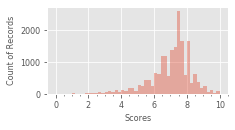

In [32]:
all_scores = sns.distplot(data.score, kde=False)
plt.xlabel('Scores')
plt.ylabel('Count of Records')
plt.minorticks_on()
plt.tick_params(axis='y', which='minor', left=False)
plt.tight_layout()

for item in ([all_scores.xaxis.label, all_scores.yaxis.label] + all_scores.get_xticklabels() + 
            all_scores.get_yticklabels()):
    item.set_fontsize(8)


fig = all_scores.get_figure()
fig.set_size_inches(3, 1.5)
fig.show()
fig.savefig('./images/score-distribution.png', dpi=100, bbox_inches="tight")

data.score.describe()

#data.score.describe()

The number of reviewers is: 564
The average number of reviews per author: 32.62943262411348
count    564.000000
mean      32.629433
std       77.301991
min        1.000000
25%        2.000000
50%        7.000000
75%       25.000000
max      749.000000
Name: reviewauthor, dtype: float64


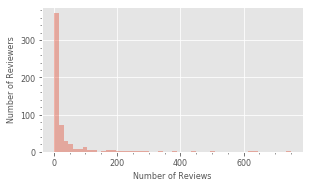

In [37]:
x = data.reviewauthor.nunique()
y = len(data)

print('The number of reviewers is: ' + str(data.reviewauthor.nunique()))
print('The average number of reviews per author: ' + str(y/x))

all_authors = data.reviewauthor.value_counts()
print(all_authors.describe())
g = sns.distplot(all_authors, kde=False)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Reviewers')
plt.tight_layout()

for item in ([g.xaxis.label, g.yaxis.label] + g.get_xticklabels() + 
            g.get_yticklabels()):
    item.set_fontsize(8)

plt.minorticks_on()

fig = g.get_figure()
fig.set_size_inches(4.25, 2.5)
fig.savefig('./images/reviewer-distribution.png', dpi=100)

In [11]:
print(all_authors.head(44).sum())
print(all_authors.head(45).sum())

10720
10819


Rock            6879
Electronic      3659
Experimental    1669
Rap             1644
Pop/R&B         1298
Metal            762
Folk/Country     748
Jazz             282
Global           162
none              11
Name: genre, dtype: int64


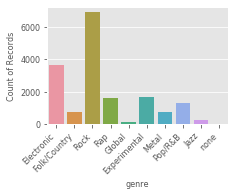

In [41]:
x = data.genre.value_counts()
print(x)
genres = sns.countplot(x='genre', data=data)
genres.set_xticklabels(genres.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Count of Records')
plt.tight_layout()

for item in ([genres.xaxis.label, genres.yaxis.label] + genres.get_xticklabels() + 
            genres.get_yticklabels()):
    item.set_fontsize(8)

fig = genres.get_figure()
fig.set_size_inches(3, 2.5)
fig.savefig('./images/genre-distribution.png', dpi=100)

In [13]:
data[data['genre'] == 'none']

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
17859,Space Dimension Controller,Love Beyond the Intersect,Philip Sherburne,6.2,2019.0,November 26 2019,none,none,0.652545,0.500836,6.727273,-17.867000,0.067545,0.108117,0.714545,0.385091,0.303255,111.209182
17866,Lamin Fofana,Black Metamorphosis,Philip Sherburne,7.2,2019.0,November 23 2019,none,none,0.686778,0.379000,6.111111,-14.875000,0.069689,0.029847,0.839444,0.122122,0.192878,116.176111
17897,Have a Nice Life,Sea of Worry,Arielle Gordon,7.4,2019.0,November 12 2019,none,none,0.334000,0.545286,5.285714,-15.499143,0.051300,0.213095,0.615543,0.229757,0.334886,135.200000
17898,Hiro Kone,A Fossil Begins to Bray,Shawn Reynaldo,8.0,2019.0,November 12 2019,none,none,0.382000,0.628000,5.125000,-10.503625,0.058675,0.041506,0.823875,0.249163,0.083450,123.463375
17943,Jonathan Fire*Eater,Tremble Under Boom Lights,Paul Thompson,8.0,2019.0,October 26 2019,none,none,0.439200,0.775100,6.900000,-7.728300,0.054060,0.093338,0.011315,0.238840,0.611100,123.879200
17971,Richard Dawson,2020,Sam Sodomsky,7.8,2019.0,October 17 2019,none,none,0.643000,0.613000,10.000000,-6.297000,0.085300,0.334000,0.000025,0.144000,0.520000,153.853000
18024,Somos,Prison on a Hill,Ian Cohen,7.4,2019.0,October 1 2019,none,none,0.474833,0.884833,4.750000,-4.496250,0.052558,0.014564,0.000882,0.309225,0.440833,141.143583
18145,Nick Catchdubs,UFO,Phillip Mlynar,6.6,2019.0,August 20 2019,none,none,0.772500,0.710500,3.500000,-6.896500,0.069450,0.078850,0.359280,0.145000,0.265000,139.040500
18192,Leech,Data Horde,Fred Thomas,7.4,2019.0,August 5 2019,none,none,0.595667,0.572833,5.333333,-15.706000,0.057483,0.211397,0.817000,0.272500,0.496667,152.646000
18217,Cherubs,Immaculada High,Chris O'Connell,7.9,2019.0,July 27 2019,none,none,0.375455,0.755182,7.909091,-10.109091,0.047245,0.000565,0.852091,0.227309,0.280000,101.161455


The earliest published album in the dataset is from: 1957.0
The most recently published album in the dataset is from: 2019.0


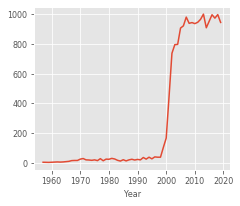

In [68]:
print('The earliest published album in the dataset is from: ' + str(data.releaseyear.min()))
print('The most recently published album in the dataset is from: ' + str(data.releaseyear.max()))


year_number = data.releaseyear.value_counts()
#print(year_number)
x = pd.DataFrame(year_number)

x = x.reset_index()

x['index'] = pd.to_datetime(x['index'].map('{:.0f}'.format), format='%Y.')
x = x.set_index('releaseyear')


x.columns = ['year']
x = x.reset_index()
x.columns = ['count', 'releaseyear']
x = x.sort_values('releaseyear', ascending=True)

y = sns.lineplot(x="releaseyear", y="count", data=x)

plt.xlabel('Year')


for item in ([y.xaxis.label, y.yaxis.label] + y.get_xticklabels() + 
            y.get_yticklabels()):
    item.set_fontsize(8)

#plt.axes.get_yaxis().set_visible(False)
y.yaxis.set_label_text("")
    
fig = y.get_figure()
fig.set_size_inches(3.5, 3)
    


#fig= plt.figure(figsize=(7,5))

#plt.xlim('1958-01-01','2018-01-01')


#plt.figure(figsize=(7,5))



plt.savefig('./images/review-count-distribution.png', dpi=100, bbox_inches="tight")

#x
#g = sns.lineplot(x.count, x.releaseyear)

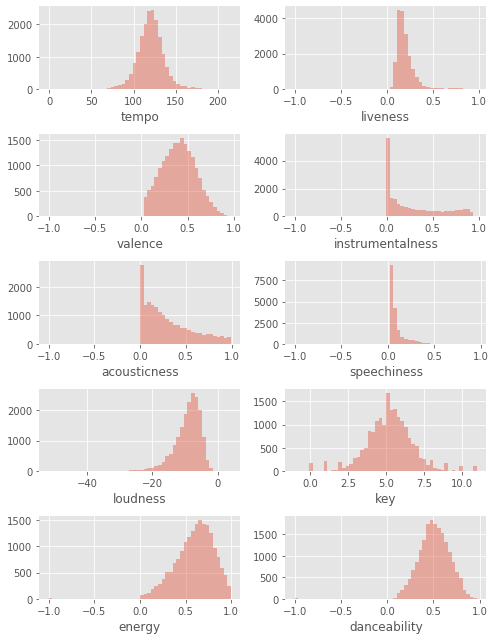

In [128]:
# Set up the matplotlib figure
f, axes = plt.subplots(5, 2, figsize=(7, 9), sharex=False)
sns.despine(left=True)
sns.distplot(data.tempo, kde=False, ax=axes[0,0])
sns.distplot(data.valence, kde=False, ax=axes[1,0])
sns.distplot(data.liveness, kde=False, ax=axes[0,1])
sns.distplot(data.instrumentalness, kde=False, ax=axes[1,1])
sns.distplot(data.acousticness, kde=False, ax=axes[2,0])
sns.distplot(data.speechiness, kde=False, ax=axes[2,1])
sns.distplot(data.loudness, kde=False, ax=axes[3,0])
sns.distplot(data.key, kde=False, ax=axes[3,1])
sns.distplot(data.energy, kde=False, ax=axes[4,0])
sns.distplot(data.danceability, kde=False, ax=axes[4,1])

plt.tight_layout()
plt.savefig('./images/test.png', dpi=100, bbox_inches="tight")


#plt.figure(1)                # the first figure
#plt.subplot(211)             # the first subplot in the first figure
#p = sns.distplot(data.tempo)
#plt.subplot(212)             # the second subplot in the first figure
#o = 
#plt.subplot(213)
#i = sns.distplot(data.liveness)

#plt.figure(1)                # figure 1 current; subplot(212) still current
#plt.subplot(211)             # make subplot(211) in figure1 current